# FitBit Tracker Exploratory Data Analysis

### Notes:
The dataset is from https://www.kaggle.com/datasets/arashnic/fitbit under the CC0: Public Domain license  
The data consist of 18 csv files and contain data for 33 participants over a period of one month from 4/12/2016 to 5/12/2016


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Data Preparation



**Preliminary screening of data:**  
- *dailyActivity* contains data from other files: *dailyCalories*, *dailyIntensities*, *dailySteps*
- There are 33 unique id's which corresponds to the number of participants.
- There seems to be no unit for the columns recording distance measures. I could not find official metadata for this data, but a supplemental reading suggests it is in Kilometers

In [2]:
dailyActivity = pd.read_csv("fitbit raw data/dailyActivity_merged.csv")
print(dailyActivity["Id"].nunique())
print(dailyActivity.info())
dailyActivity.head()

33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calorie

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
dailyCalories = pd.read_csv("fitbit raw data/dailyCalories_merged.csv")
dailyCalories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [4]:
dailyIntensities= pd.read_csv("fitbit raw data/dailyIntensities_merged.csv")
dailyIntensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


In [5]:
dailySteps = pd.read_csv("fitbit raw data/dailySteps_merged.csv")
dailySteps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [6]:
heartrate_seconds = pd.read_csv("fitbit raw data/heartrate_seconds_merged.csv")
heartrate_seconds.head(20)
#heart rates measured in intervals of 5 seconds

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101
5,2022484408,4/12/2016 7:22:05 AM,95
6,2022484408,4/12/2016 7:22:10 AM,91
7,2022484408,4/12/2016 7:22:15 AM,93
8,2022484408,4/12/2016 7:22:20 AM,94
9,2022484408,4/12/2016 7:22:25 AM,93


In [7]:
hourlyCalories = pd.read_csv("fitbit raw data/hourlyCalories_merged.csv")
hourlyCalories.info()
#calories burned recorded in intervals of 1 hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [8]:
hourlyIntensities = pd.read_csv("fitbit raw data/hourlyIntensities_merged.csv")
hourlyIntensities.info()
#intensity recorded in intervals of 1 hour
#no unit for intensity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [9]:
hourlySteps = pd.read_csv("fitbit raw data/hourlySteps_merged.csv")
hourlySteps.info()
#number of steps recorded in intervals of 1 hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [10]:
minuteCaloriesNarrow = pd.read_csv("fitbit raw data/minuteCaloriesNarrow_merged.csv")
minuteCaloriesNarrow.head(20)
#lack of documentation

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865
5,1503960366,4/12/2016 12:05:00 AM,0.9438
6,1503960366,4/12/2016 12:06:00 AM,0.9438
7,1503960366,4/12/2016 12:07:00 AM,0.9438
8,1503960366,4/12/2016 12:08:00 AM,0.9438
9,1503960366,4/12/2016 12:09:00 AM,0.9438


In [11]:
minuteCaloriesWide = pd.read_csv("fitbit raw data/minuteCaloriesWide_merged.csv")
minuteCaloriesWide.head()
#lack of documentation

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,0.9438,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
2,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
3,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
4,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865


In [12]:
minuteIntensitiesNarrow = pd.read_csv("fitbit raw data/minuteIntensitiesNarrow_merged.csv")
minuteIntensitiesNarrow["Intensity"].value_counts()
#lack of documentation

0    1112102
1     180891
3      19838
2      12749
Name: Intensity, dtype: int64

In [13]:
minuteIntensitiesWide = pd.read_csv("fitbit raw data/minuteIntensitiesWide_merged.csv")
minuteIntensitiesWide.head()
#lack of documentation

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,0,1,1,0,1,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
minuteMETsNarrow = pd.read_csv("fitbit raw data/minuteMETsNarrow_merged.csv")
minuteMETsNarrow.head()
#lack of documentation 

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [15]:
minuteSleep = pd.read_csv("fitbit raw data/minuteSleep_merged.csv")
minuteSleep.head()
#lack of documentation

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [16]:
minuteStepsNarrow = pd.read_csv("fitbit raw data/minuteStepsNarrow_merged.csv")
minuteStepsNarrow.head()
#number of steps in intervals of 1 minute

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [17]:
minuteStepsWide = pd.read_csv("fitbit raw data/minuteStepsWide_merged.csv")
minuteStepsWide.head(10)
#lack of documentation

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1503960366,4/13/2016 5:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1503960366,4/13/2016 6:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1503960366,4/13/2016 7:00:00 AM,0,0,0,0,0,0,0,0,...,16,13,0,0,0,0,0,0,0,16
8,1503960366,4/13/2016 8:00:00 AM,0,0,0,0,0,0,0,0,...,0,21,0,0,0,0,31,0,42,2
9,1503960366,4/13/2016 9:00:00 AM,0,14,10,31,37,17,25,12,...,0,8,0,0,0,0,0,0,0,105


In [18]:
sleepDay = pd.read_csv("fitbit raw data/sleepDay_merged.csv")
sleepDay.head()
#number of times asleep, total time asleep measured in minutues, total time in bed measured in minutes

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [19]:
weightLogInfo = pd.read_csv("fitbit raw data/weightLogInfo_merged.csv")
weightLogInfo.head()

#weight in kg and pounds, fat, BMI, and manual report indicator

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


**Data Cleaning:**  
- We will clean the data for the csv files we will use in the analysis  
- We will be using *dailyActivity*, *hourlyCalories*, *hourlySteps*, and *sleepDay*,
- The datasets are well cleaned already and there are no missing values except for the "Fat" column in *weightLogInfo*

In [20]:
dailyActivity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [21]:
hourlyCalories.isnull().sum()

Id              0
ActivityHour    0
Calories        0
dtype: int64

In [22]:
hourlySteps.isnull().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

In [23]:
sleepDay.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [24]:
weightLogInfo.isnull().sum()
#there are 67 rows in this dataset and 65 missing entries in "Fat" column. We should simply disregard that column in the analysis.


Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

## Univariate Analysis

Descriptive statistics for the *dailyActivity* dataframe  
  
The mean number steps taken per day is about 7638. According to [MedicalNewsToday](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day#for-general-health), doctors generally consider taking 5000 steps per day to be "sedentary". A 2020 study found that participants who took 8,000 steps per day had a 51% lower riskTrusted Source of dying by any cause. The histogram of TotalSteps shows a slight right skew and a significant number of entries with 0-499 steps which is undesirable. One idea could be to notify users to pay attention to steps taken at the beginning of the day.




In [25]:
dailyActivity.drop(columns=['Id']).describe()


,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


Histograms for daily activity metrics  
  
The distribution of TotalSteps is somewhat right skewed with a spike of entries below 500 steps.    
The distribution for Calories seems to be bimodal with a peak around 2000 calories and second peak around 2700 calories.  
The distribution for VeryActiveMintues and FairlyActiveMintues are extremely right skewed.  
The distribution for LightlyActiveMinutes seems unimodal except for a spike of entries below 20 minutes.  
The distribution for SedentaryMinutes seems to be bimodal and left skewed with an additional spike for entries above 1400 minutes.  
  
There is a spike in entries both for the low end of LightlyActiveMinutes and the high end of SedentaryMinutes suggesting there are many days where people are minimally active. One goal to implement could be to nudge users to get past this threshold of minimal activity each day. 


In [26]:
fig = px.histogram(
    dailyActivity, 
    x='TotalSteps',
    nbins= 94,
    title='Histogram of Total Steps',
    width=800
    )
fig.show()

fig = px.violin(
    dailyActivity,
    x='TotalSteps',
    box=True,
    points='all',
    title='Violin plot of Total Steps',
    width=800
)
fig.show()

fig = px.histogram(
    dailyActivity, 
    x='Calories',
    nbins= 94,
    title='Histogram of Calories',
    width=800
    )
fig.show()

fig = px.histogram(
    dailyActivity, 
    x='VeryActiveMinutes',
    title='Histogram of Very Active Minutes',
    width=800
    )
fig.show()

fig = px.histogram(
    dailyActivity, 
    x='FairlyActiveMinutes',
    title='Histogram of Fairly Active Minutes',
    width=800
    )
fig.show()

fig = px.histogram(
    dailyActivity, 
    x='LightlyActiveMinutes',
    title='Histogram of Lightly Active Minutes',
    width=800
    )
fig.show()

fig = px.histogram(
    dailyActivity, 
    x='SedentaryMinutes',
    title='Histogram of Sedentary Minutes',
    width=800
    )
fig.show()

Calculating the percentage of entries with less than 5000 steps.  
  
About 32% of entries are considered to be sedentary. One improvement could be to encourage people to walk at least 5000 steps a day with notifications.

In [27]:
len(dailyActivity[dailyActivity['TotalSteps'] < 5000])/len(dailyActivity)


0.3223404255319149

Grouping *dailyActivity* by "Id" and aggregating the columns by mean. The resulting dataframe contains the daily averages of each column for each participant. We could use the averages for each individual to represent the overall fitness characteristics for each individual.

In [28]:
dailyActivity_agg = dailyActivity.groupby(['Id']).agg(['mean'])
dailyActivity_agg.columns = dailyActivity_agg.columns.map('_'.join)
dailyActivity_agg.head()

,TotalSteps_mean,TotalDistance_mean,TrackerDistance_mean,LoggedActivitiesDistance_mean,VeryActiveDistance_mean,ModeratelyActiveDistance_mean,LightActiveDistance_mean,SedentaryActiveDistance_mean,VeryActiveMinutes_mean,FairlyActiveMinutes_mean,LightlyActiveMinutes_mean,SedentaryMinutes_mean,Calories_mean
Id,,,,,,,,,,,,,
1503960366,12116.741935,7.809677,7.809677,0.0,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,219.935484,848.161290,1816.419355
1624580081,5743.903226,3.914839,3.914839,0.0,0.939355,0.360645,2.606774,0.006129,8.677419,5.806452,153.483871,1257.741935,1483.354839
1644430081,7282.966667,5.295333,5.295333,0.0,0.730000,0.951000,3.609000,0.004000,9.566667,21.366667,178.466667,1161.866667,2811.300000
1844505072,2580.064516,1.706129,1.706129,0.0,0.008387,0.049032,1.647419,0.000000,0.129032,1.290323,115.451613,1206.612903,1573.483871
1927972279,916.129032,0.634516,0.634516,0.0,0.095806,0.031290,0.507097,0.000000,1.322581,0.774194,38.580645,1317.419355,2172.806452


In [68]:
fig = px.histogram(
    dailyActivity_agg, 
    x='TotalSteps_mean',
    nbins=15,
    title='Histogram of mean Total Steps',
    width=800
    )
fig.show()


Grouping *hourlyCalories* and *hourlySteps* by hour in the day

In [31]:
hourlyCalories['ActivityHour'] = pd.to_datetime(hourlyCalories['ActivityHour']) #convert column to datetime
hourlyCalories['hour_value'] = hourlyCalories['ActivityHour'].dt.hour #create new column with hour value for grouping
hourlyCalories_agg = hourlyCalories.groupby(['hour_value']).agg(['mean']).round(3)
hourlyCalories_agg.drop(['Id'], axis=1, inplace=True)
hourlyCalories_agg.columns = hourlyCalories_agg.columns.map('_'.join)
hourlyCalories_agg



,Calories_mean
hour_value,
0,71.805
1,70.165
2,69.186
3,67.538
4,68.262
5,81.708
6,86.997
7,94.478
8,103.337


Bar Chart showing mean hourly calories burnt by hour of day  
  
The graph follows intuition in that most calories are burn during the day between 8am and 8pm where the mean calories burnt are over 100

In [32]:
px.bar(
    hourlyCalories_agg,
    y='Calories_mean',
    title='Mean Calories by Hour of the Day',
    width=800
)

In [33]:
hourlySteps['ActivityHour'] = pd.to_datetime(hourlySteps['ActivityHour']) #convert column to datetime
hourlySteps['hour_value'] = hourlySteps['ActivityHour'].dt.hour #create new column with hour value for grouping
hourlySteps_agg = hourlySteps.groupby(['hour_value']).agg(['mean']).round(3)
hourlySteps_agg.drop(['Id'], axis=1, inplace=True)
hourlySteps_agg.columns = hourlySteps_agg.columns.map('_'.join)
hourlySteps_agg


,StepTotal_mean
hour_value,
0,42.188
1,23.103
2,17.110
3,6.427
4,12.700
5,43.869
6,178.508
7,306.049
8,427.545


Bar chart showing mean steps taken by hour of day  
  
This chart also makes intuitive sense where most of the steps are taken during the day.

In [34]:
px.bar(
    hourlySteps_agg,
    y='StepTotal_mean',
    title='Mean Steps by Hour of the Day',
    width=800
)

In [35]:
print(sleepDay['Id'].nunique())

sleepDay.head()
#not everyone recorded sleep data. only 24 individuals

24


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [36]:
px.histogram(
    sleepDay,
    x='TotalMinutesAsleep',
    nbins=40,
    title='Histogram of Total Minutes Asleep',
    width=800
)

Descriptive statistics for the *sleepDay* dataframe  
  
The mean of total minutes asleep is around 419 translates to right under 7 hours of sleep per night, which according to [Mayo Clinic](https://www.mayoclinic.org/healthy-lifestyle/adult-health/expert-answers/how-many-hours-of-sleep-are-enough/faq-20057898) is right at the recommended amount of sleep for adults. 

In [37]:
sleepDay.drop(columns=['Id','SleepDay']).describe().round(3)
#sleep duration slightly left skewed

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.000,413.000,413.000
mean,1.119,419.467,458.639
std,0.346,118.345,127.102
min,1.000,58.000,61.000
25%,1.000,361.000,403.000
50%,1.000,433.000,463.000
75%,1.000,490.000,526.000
max,3.000,796.000,961.000


Calculating the percentage of records with less than 7 hours of sleep  
  
Around 44% of entries have under the recommended 7 hours of sleep which is less than ideal. 

In [70]:
len(sleepDay[sleepDay['TotalMinutesAsleep'] < 420])/len(sleepDay)

0.4406779661016949

Grouping *sleepDay* by "Id" and aggregating the columns by mean. The resulting dataframe contains the daily averages for each individual.

In [38]:
sleepDay_agg = sleepDay.groupby(['Id']).agg(['mean']).round(3)
sleepDay_agg.columns = sleepDay_agg.columns.map('_'.join)
sleepDay_agg

,TotalSleepRecords_mean,TotalMinutesAsleep_mean,TotalTimeInBed_mean
Id,,,
1503960366,1.080,360.280,383.200
1644430081,1.000,294.000,346.000
1844505072,1.000,652.000,961.000
1927972279,1.600,417.000,437.800
2026352035,1.000,506.179,537.643
2320127002,1.000,61.000,69.000
2347167796,1.000,446.800,491.333
3977333714,1.143,293.643,461.143
4020332650,1.000,349.375,379.750


In [39]:
px.histogram(
    sleepDay_agg,
    x='TotalMinutesAsleep_mean',
    title='Histogram of mean Total Minutes Asleep',
    width=800
)

Grouping *sleepDay* by "SleepDay" and aggregating the columns by mean. The resulting dataframe contains the average sleep measurements by the date.

In [40]:
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'])
sleepDay['day_of_week'] = sleepDay['SleepDay'].dt.dayofweek #monday denoted by 0
sleepDay_day_agg = sleepDay.drop(columns=['Id','day_of_week']).groupby(['SleepDay']).agg(['mean']).round(3)
sleepDay_day_agg.columns = sleepDay_day_agg.columns.map('_'.join)
sleepDay_day_agg

,TotalSleepRecords_mean,TotalMinutesAsleep_mean,TotalTimeInBed_mean
SleepDay,,,
2016-04-12,1.231,441.923,479.692
2016-04-13,1.571,430.429,471.857
2016-04-14,1.077,445.231,480.231
2016-04-15,1.118,427.471,476.353
2016-04-16,1.357,391.714,433.000
2016-04-17,1.250,464.083,509.167
2016-04-18,1.300,419.900,455.900
2016-04-19,1.143,409.071,451.571
2016-04-20,1.067,446.267,476.733


In [41]:
px.bar(
    sleepDay_day_agg,
    y='TotalMinutesAsleep_mean',
    title="Average Minutes Asleep by Date",
    width=1000
)

In [42]:
sleepDay_dayofweek_agg = sleepDay.drop(columns=['Id']).groupby(['day_of_week']).agg(['mean']).round(3)
sleepDay_dayofweek_agg.columns = sleepDay_dayofweek_agg.columns.map('_'.join)
sleepDay_dayofweek_agg
#monday denoted by 0

#not exactly sure how this is documented. The minutes asleep column could refer to the time slept the night before. For example, if day_of_week is 6, it refers to Saturday night.

,TotalSleepRecords_mean,TotalMinutesAsleep_mean,TotalTimeInBed_mean
day_of_week,,,
0,1.106,418.830,456.170
1,1.108,404.538,443.292
2,1.152,434.682,470.030
3,1.031,402.369,435.800
4,1.070,405.421,445.053
5,1.190,420.810,461.276
6,1.182,452.745,503.509


In [43]:
px.bar(
    sleepDay_dayofweek_agg,
    y='TotalMinutesAsleep_mean',
    title='Average Minutes Asleep by Day of Week',
    width=800
)

## Bivariate Analysis

In [44]:
sleepDay

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_week
0,1503960366,2016-04-12,1,327,346,1
1,1503960366,2016-04-13,2,384,407,2
2,1503960366,2016-04-15,1,412,442,4
3,1503960366,2016-04-16,2,340,367,5
4,1503960366,2016-04-17,1,700,712,6
...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360,5
409,8792009665,2016-05-01,1,503,527,6
410,8792009665,2016-05-02,1,415,423,0
411,8792009665,2016-05-03,1,516,545,1


In [45]:
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'])
merged_activity_sleep=pd.merge(dailyActivity,sleepDay, how='inner', left_on=['Id','ActivityDate'], right_on=['Id','SleepDay'])
merged_activity_sleep

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1,327,346,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,2,384,407,2
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1,412,442,4
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,2,340,367,5
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,2016-04-17,1,700,712,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,2016-04-30,1,343,360,5
409,8792009665,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,2016-05-01,1,503,527,6
410,8792009665,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,2016-05-02,1,415,423,0
411,8792009665,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,2016-05-03,1,516,545,1


Scatterplots of different levels of active minutes with total minutes asleep in that day.  
  
For VeryActiveMinutes, FairlyActiveMinutes, and Lightly Active Minutes there is no clear association. However, there is a visibly negative correlation between SedentaryMinutes and TotalMinutesAsleep. In the higher end of SedentaryMinutes, there is likely a mutual exclusivity with TotalMinutesAsleep because the number of SedentaryMinutes is associated with time spent awake. Regardless, there is a noticeable negative correlation even before SedentaryMinutes might inherently cut into TotalMinutesAsleep.

In [46]:
px.scatter(
    merged_activity_sleep,
    x='VeryActiveMinutes',
    y='TotalMinutesAsleep',
    width=600
)

In [47]:
px.scatter(
    merged_activity_sleep,
    x='FairlyActiveMinutes',
    y='TotalMinutesAsleep',
    width=600
)

In [48]:
px.scatter(
    merged_activity_sleep,
    x='LightlyActiveMinutes',
    y='TotalMinutesAsleep',
    width=600
)

In [49]:
px.scatter(
    merged_activity_sleep,
    x='SedentaryMinutes',
    y='TotalMinutesAsleep',
    width=600,
    trendline='ols'
)
#R^2 is 0.36

In [50]:
px.scatter(
    merged_activity_sleep,
    x='Calories',
    y='TotalMinutesAsleep',
    width=600
)

In [51]:
px.scatter(
    merged_activity_sleep,
    x='TotalSteps',
    y='TotalMinutesAsleep',
    width=600,
)

Correlation Heatmap of *merged_activity_sleep*  
  
We can see that SedentaryMinutes is negatively correlated with TotalMinutesAsleep and the distance, active minutes, and calories are positively correlated with each other which makes sense.

<AxesSubplot:>

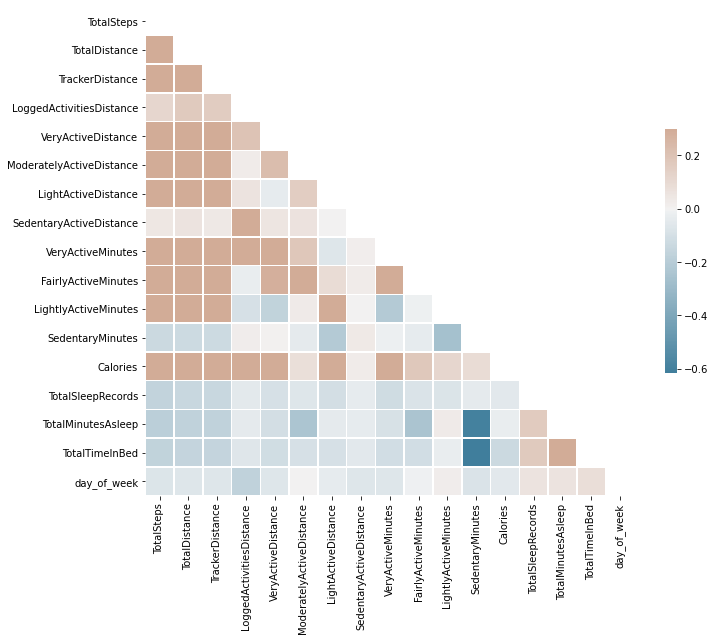

In [61]:
corr = merged_activity_sleep.drop(columns=['Id']).corr() #creating correlation matrix and dropping 'Id' column
mask = np.triu(np.ones_like(corr,dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 30, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Summary  
  
We were able to identify some trends in the daily activity of users by looking at metrics such as the number of steps taken and the number of minutes in differing intensities of activity. We were then able to identify some lacking areas in user daily activity based on outside research in the healthcare field and make suggestions for how FitBit could better target and implement fitness goals to promote better health overall for users. For example, urging users to achieve a minimum threshold of activity and reminding users to take enough steps and get enough sleep. 
  
There were no metrics to identify user characteristics besides fitness activity, so we could not dig deeper into the characteristics of the users. Many of the data files lacked documentation for units of measurement and structure. There was also a lack of documentation for these files from the data source. So we attempted analysis on only the data with intuitive measurements in the column name.